In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyphotonicsims.components.elements import *
from pyphotonicsims.box_integration import get_box_path
import h5py

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [4,3]

## Directional coupler
 - Coupling power
 $$\kappa = \sin{\frac{\pi \delta n L_c}{\lambda}}$$
 - Coupling rate for resonator
 $$\gamma_{ex} = \frac{c\log{1/(1-\kappa^2)}}{n_g L}$$

(0.0, 10.0)

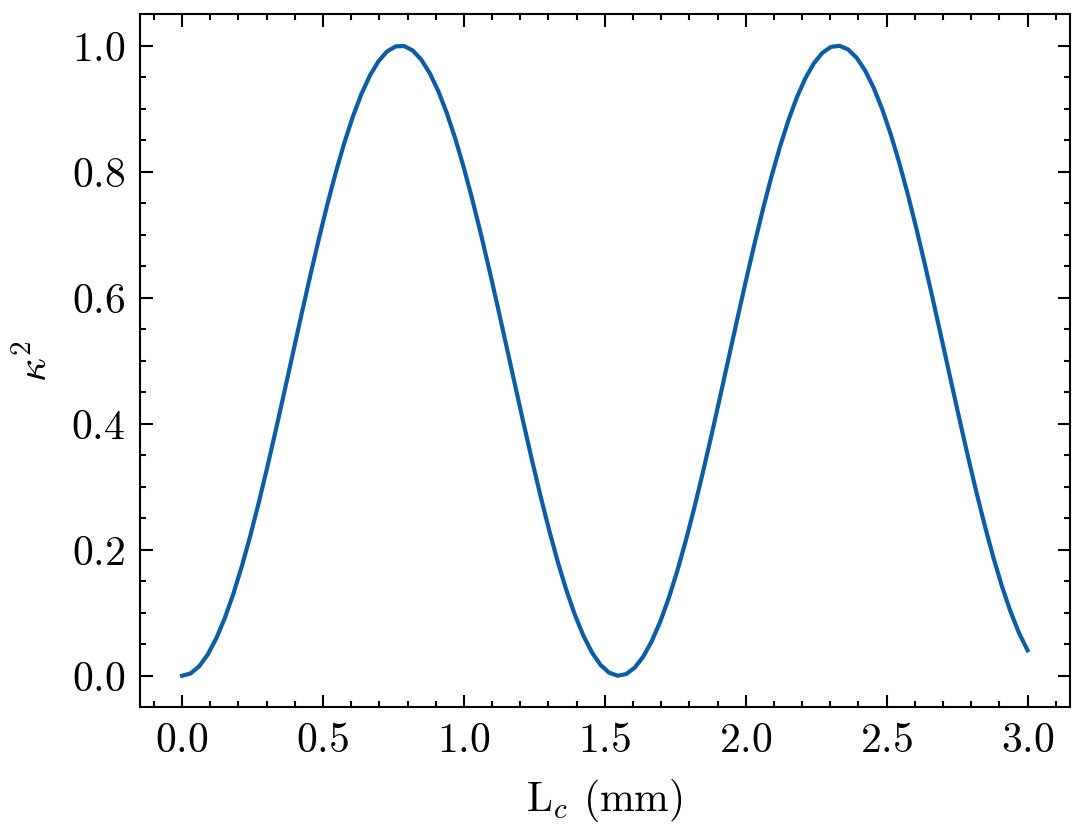

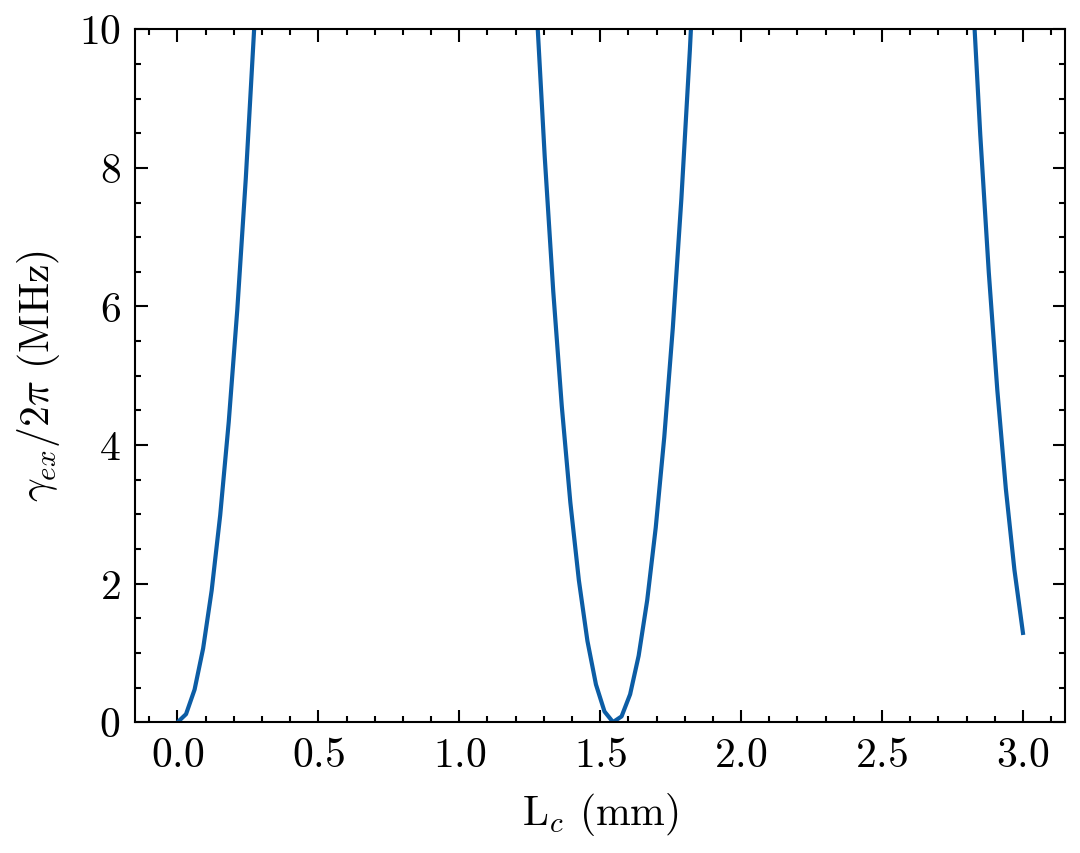

In [2]:
dn = 0.001
L = 1.0
ng = 1.53
wl = 1550e-9
Lc = np.linspace(0, 3e-3, 100)
ka2 = directional_coupler(dn, Lc, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lc*1e3, ka2)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\kappa^2$')

plt.figure()
plt.plot(Lc*1e3, r_ex)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.ylim((0, 10))

### 6 $\mu$m by 80 nm waveguide coupling $\delta n_{eff} $simulations at 2.5 $\mu$m gap

In [3]:
base_path = 'Simulations/lumerical mode/coupler/6um by 80nm waveguide'
filename = 'coupling_data_6umby80nm_gap_2_5um_sweep_wl_750_to_1650.mat'
filepath = get_box_path(base_path, filename)
f = h5py.File(filepath, 'r')
dneff = f['dneff'][:]
wl_list = f['wl_list'][:][0]
dneff.shape

(6, 46)

(0.001, 20)

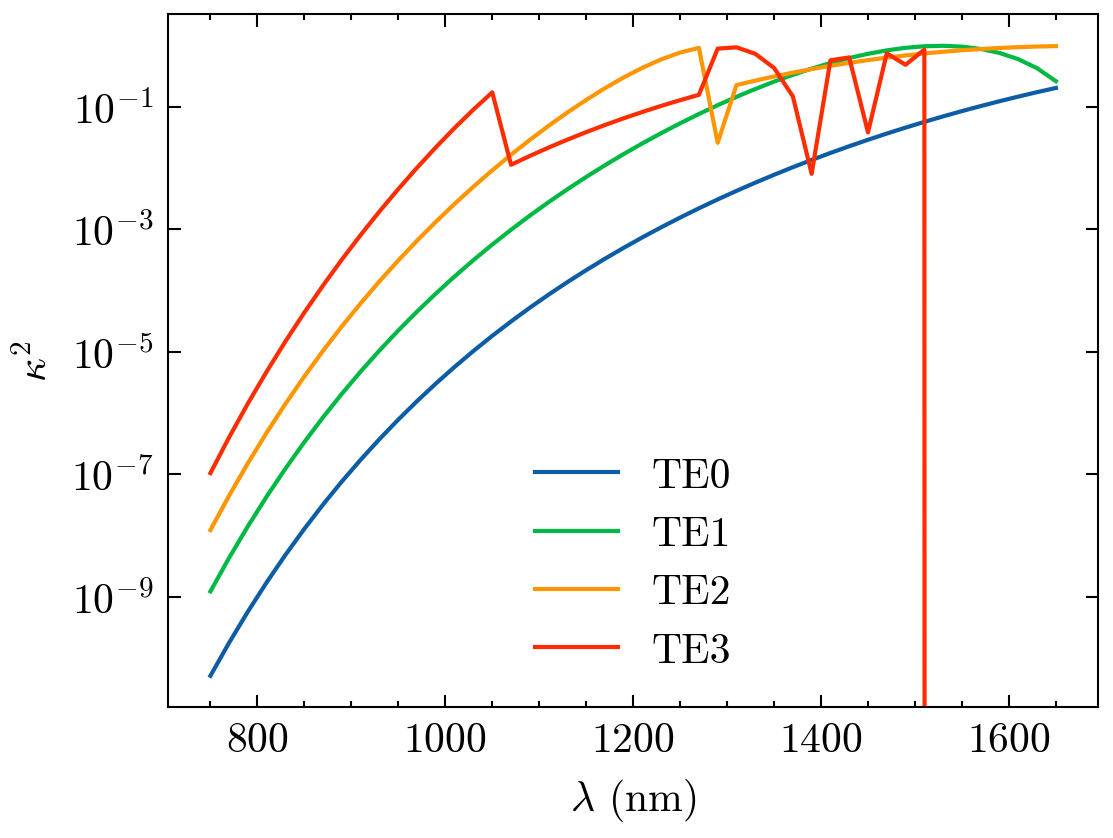

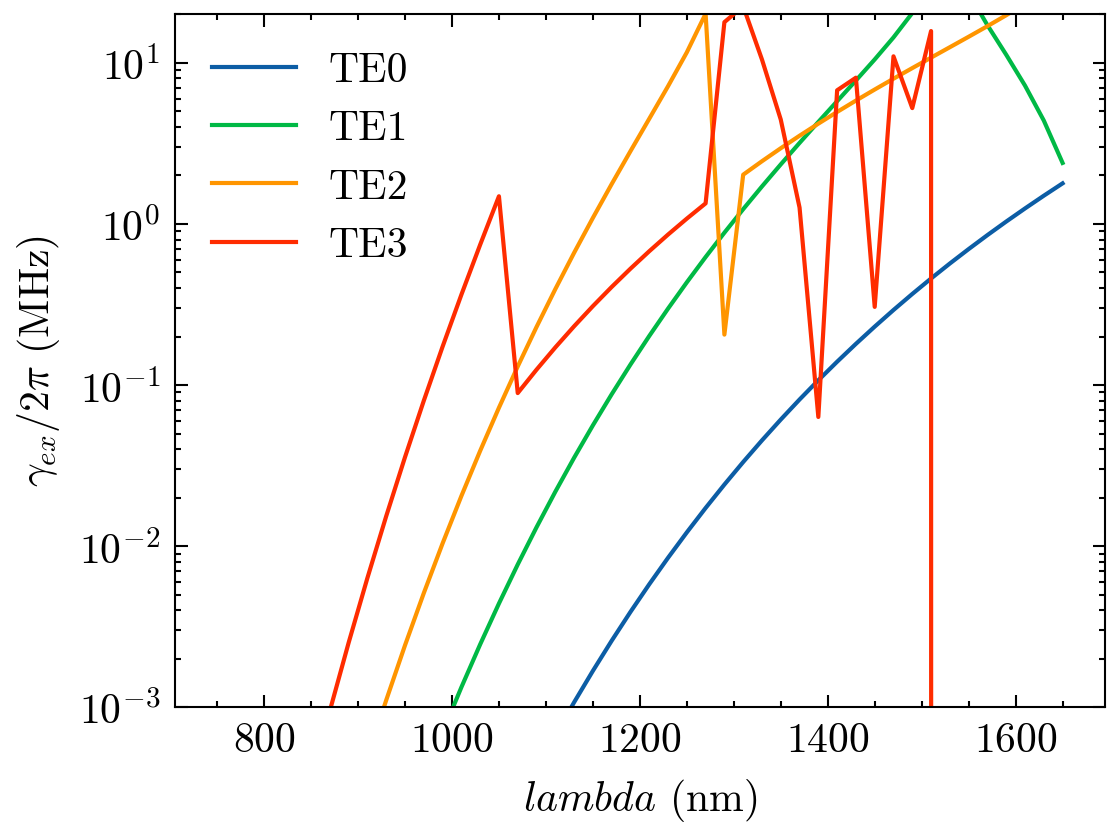

In [4]:
wl = 1550e-9
ng = 1.53
Lx = 1e-3
L = 4.0

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TE2': 2, 'TE3': 3}
mode_list = ['TE0', 'TE1', 'TE2', 'TE3']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]

ka2 = np.array([directional_coupler(dneff[ii, :], Lx, wl_list) for ii in mode_ind])
# kam = 4*ka2*(1-ka2)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.semilogy(wl_list*1e9, ka2.T)
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list)

plt.figure()
plt.semilogy(wl_list*1e9, r_ex.T)
plt.xlabel(r'$lambda$ (nm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.legend(mode_list)
plt.ylim(1e-3, 20)

### 6 $\mu$m by 80 nm waveguide coupling $\delta n_{eff} $simulations at 0.8 $\mu$m gap

In [5]:
base_path = 'Simulations/lumerical mode/coupler/6um by 80nm waveguide'
filename = 'coupling_data_6umby80nm_gap_0_8um_sweep_wl_750_to_1650.mat'
filepath = get_box_path(base_path, filename)
f = h5py.File(filepath, 'r')
dneff = f['dneff'][:]
wl_list = f['wl_list'][:][0]
pol = f['pol_TE'][:]
dneff.shape

(6, 46)

(0.001, 100.0)

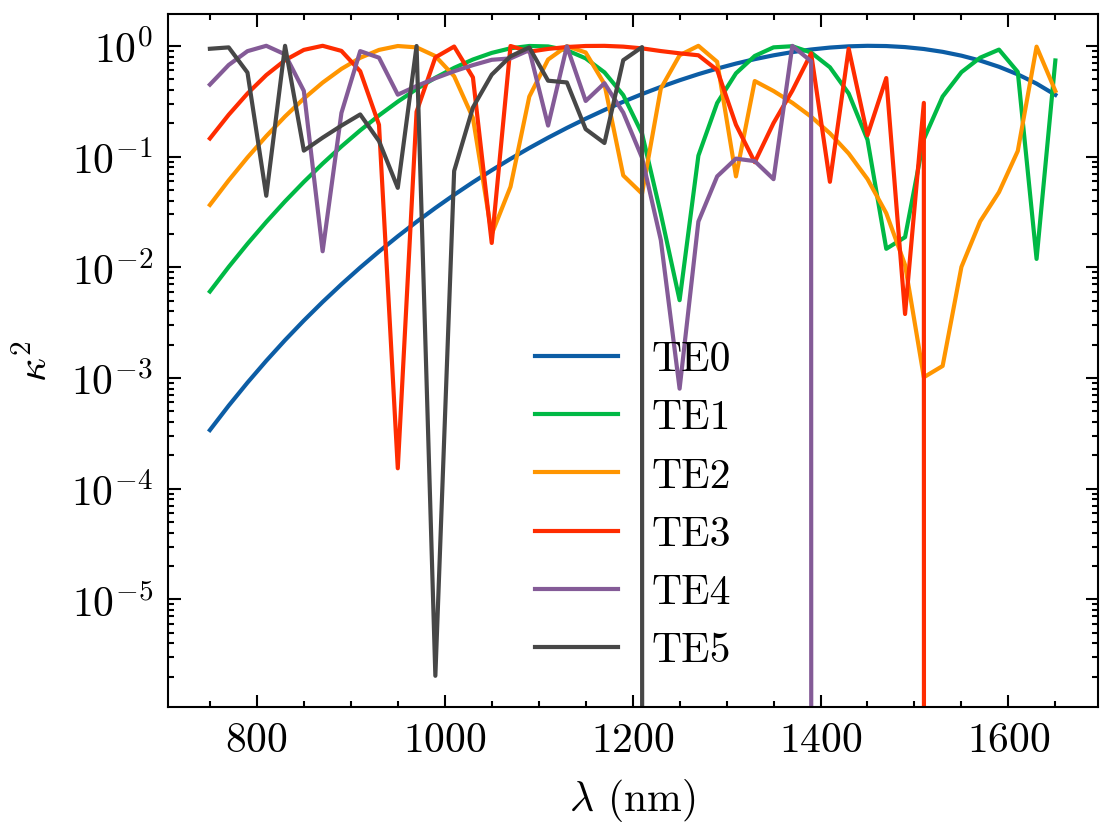

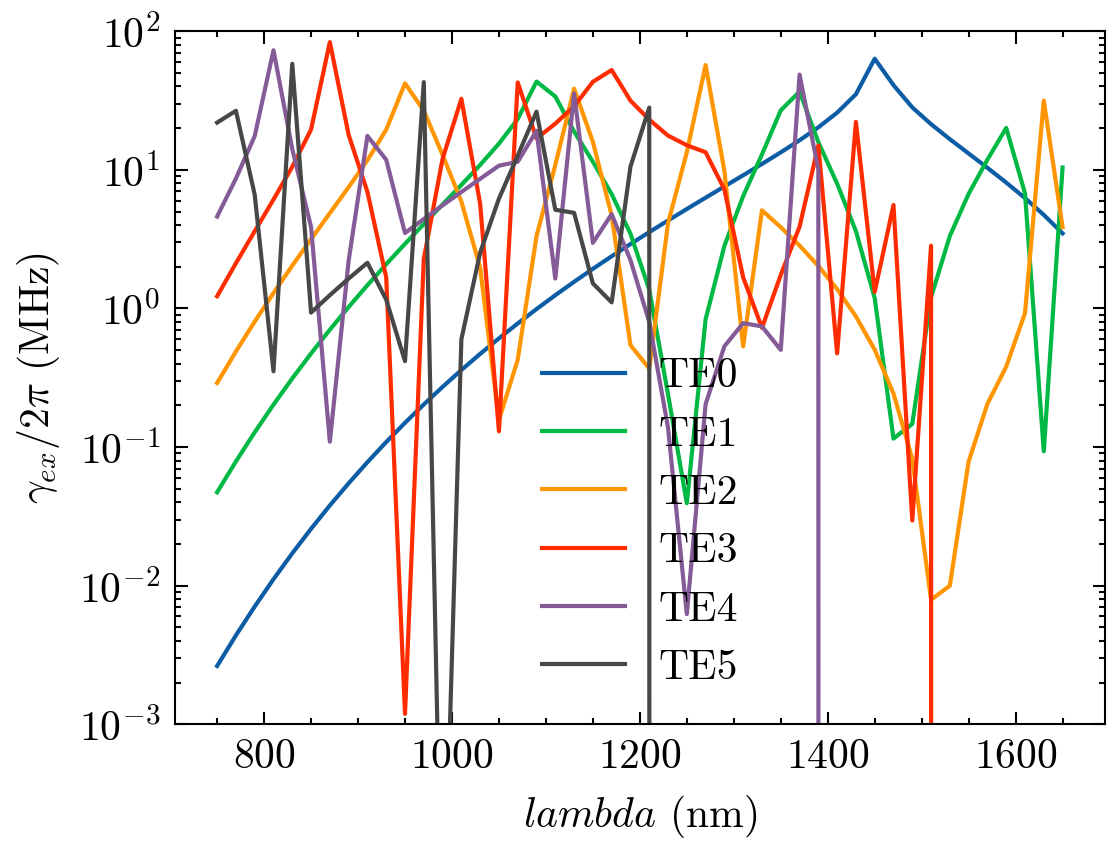

In [6]:
wl = 1550e-9
ng = 1.53
Lx = 1e-3
L = 4.0

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TE2': 2, 'TE3': 3, 'TE4': 4, 'TE5': 5}
mode_list = ['TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'TE5']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]

ka2 = np.array([directional_coupler(dneff[ii, :], Lx, wl_list) for ii in mode_ind])
# kam = 4*ka2*(1-ka2)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.semilogy(wl_list*1e9, ka2.T)
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list)

plt.figure()
plt.semilogy(wl_list*1e9, r_ex.T)
plt.xlabel(r'$lambda$ (nm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.legend(mode_list)
plt.ylim(1e-3, 1e2)

In [7]:
pol[0,:]

array([0.99999315, 0.99999259, 0.999992  , 0.99999138, 0.99999073,
       0.99999005, 0.99998933, 0.99998858, 0.99998779, 0.99998697,
       0.99998612, 0.99998522, 0.99998429, 0.99998332, 0.99998232,
       0.99998128, 0.9999802 , 0.99997909, 0.99997795, 0.99997677,
       0.99997556, 0.99997432, 0.99997305, 0.99997177, 0.99997046,
       0.99996913, 0.99996779, 0.99996644, 0.99996508, 0.99996372,
       0.99996237, 0.99996102, 0.99995967, 0.99995834, 0.99995703,
       0.99995575, 0.99995449, 0.99995326, 0.99995207, 0.99995091,
       0.9999498 , 0.99994873, 0.9999477 , 0.99994673, 0.99994582,
       0.99994496])